# Malaria Detection
Malaria poses a global health problem, and the number of cases and deaths are alarmingly increasing over the recent years worldwide. The current blood inspection and traditional method of malaria detection and diagnosis are time consuming and prone to error. Early detection of malaria is important as it allows for timely treatment that provides faster and more accurate diagnosis for patients while significantly improving the chances of a full recovery and reducing the risk of complications and death.

**Acknowledgements**

This Dataset is taken from the official US National Library of Medicine's NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/. It is a repository of segmented cells from the thin blood smear slide images from the Malaria Screener research activity.


The dataset contains 27,558 color images and 2 folders - infected and uninfected.

In [ ]:
!pip install timm

In [ ]:
import numpy as np 
import pandas as pd
import timm
from fastai.vision.all import *
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Data Preprocessing

#### Assign Images and Labels into Variables

In [3]:
parasitized = '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized'
parasite=[]

for dirname, _, filenames in os.walk(parasitized):
    for filename in filenames:
        img = os.path.join(parasitized, filename)
        parasite.append(img)
        


In [4]:
parasitized_df = pd.DataFrame(parasite,columns =['path'])
parasitized_df['label'] = 'parasitized'

In [5]:
uninfected_path = '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected'
uninfected=[]

for dirname, _, filenames in os.walk(uninfected_path):
    for filename in filenames:
        img = os.path.join(uninfected_path, filename)
        uninfected.append(img)
        

In [6]:
uninfected_df = pd.DataFrame(uninfected,columns =['path'])
uninfected_df['label'] = 'uninfected'

In [7]:
list = [uninfected_df, parasitized_df]
df = pd.concat(list)

In [8]:
df

,path,label
0,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png,uninfected
1,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png,uninfected
2,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png,uninfected
3,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png,uninfected
4,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png,uninfected
...,...,...
13775,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C175P136NThinF_IMG_20151127_142009_cell_213.png,parasitized
13776,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C118P79ThinF_IMG_20151002_105125_cell_156.png,parasitized
13777,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171844_cell_85.png,parasitized
13778,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C91P52ThinF_IMG_20150821_124937_cell_189.png,parasitized


#### Handling null values

In [9]:
# Check for missing values
missing_val_count_by_column = (df.isnull().sum())
print("Missing values for columns:")
print(missing_val_count_by_column)
print()
print("Missing values in dataset:" ,missing_val_count_by_column.sum())

Missing values for columns:
path     0
label    0
dtype: int64

Missing values in dataset: 0


#### Check For duplicates

In [10]:
# check duplicates
print("\nDuplicate data count: " + str(df.duplicated().sum()))


Duplicate data count: 0


#### Filter non-functioning/irrevelant data

In [11]:
df = df[df['path'].str.contains('.png')]
df = df.reset_index(drop=True)

#### Check if data is imbalance

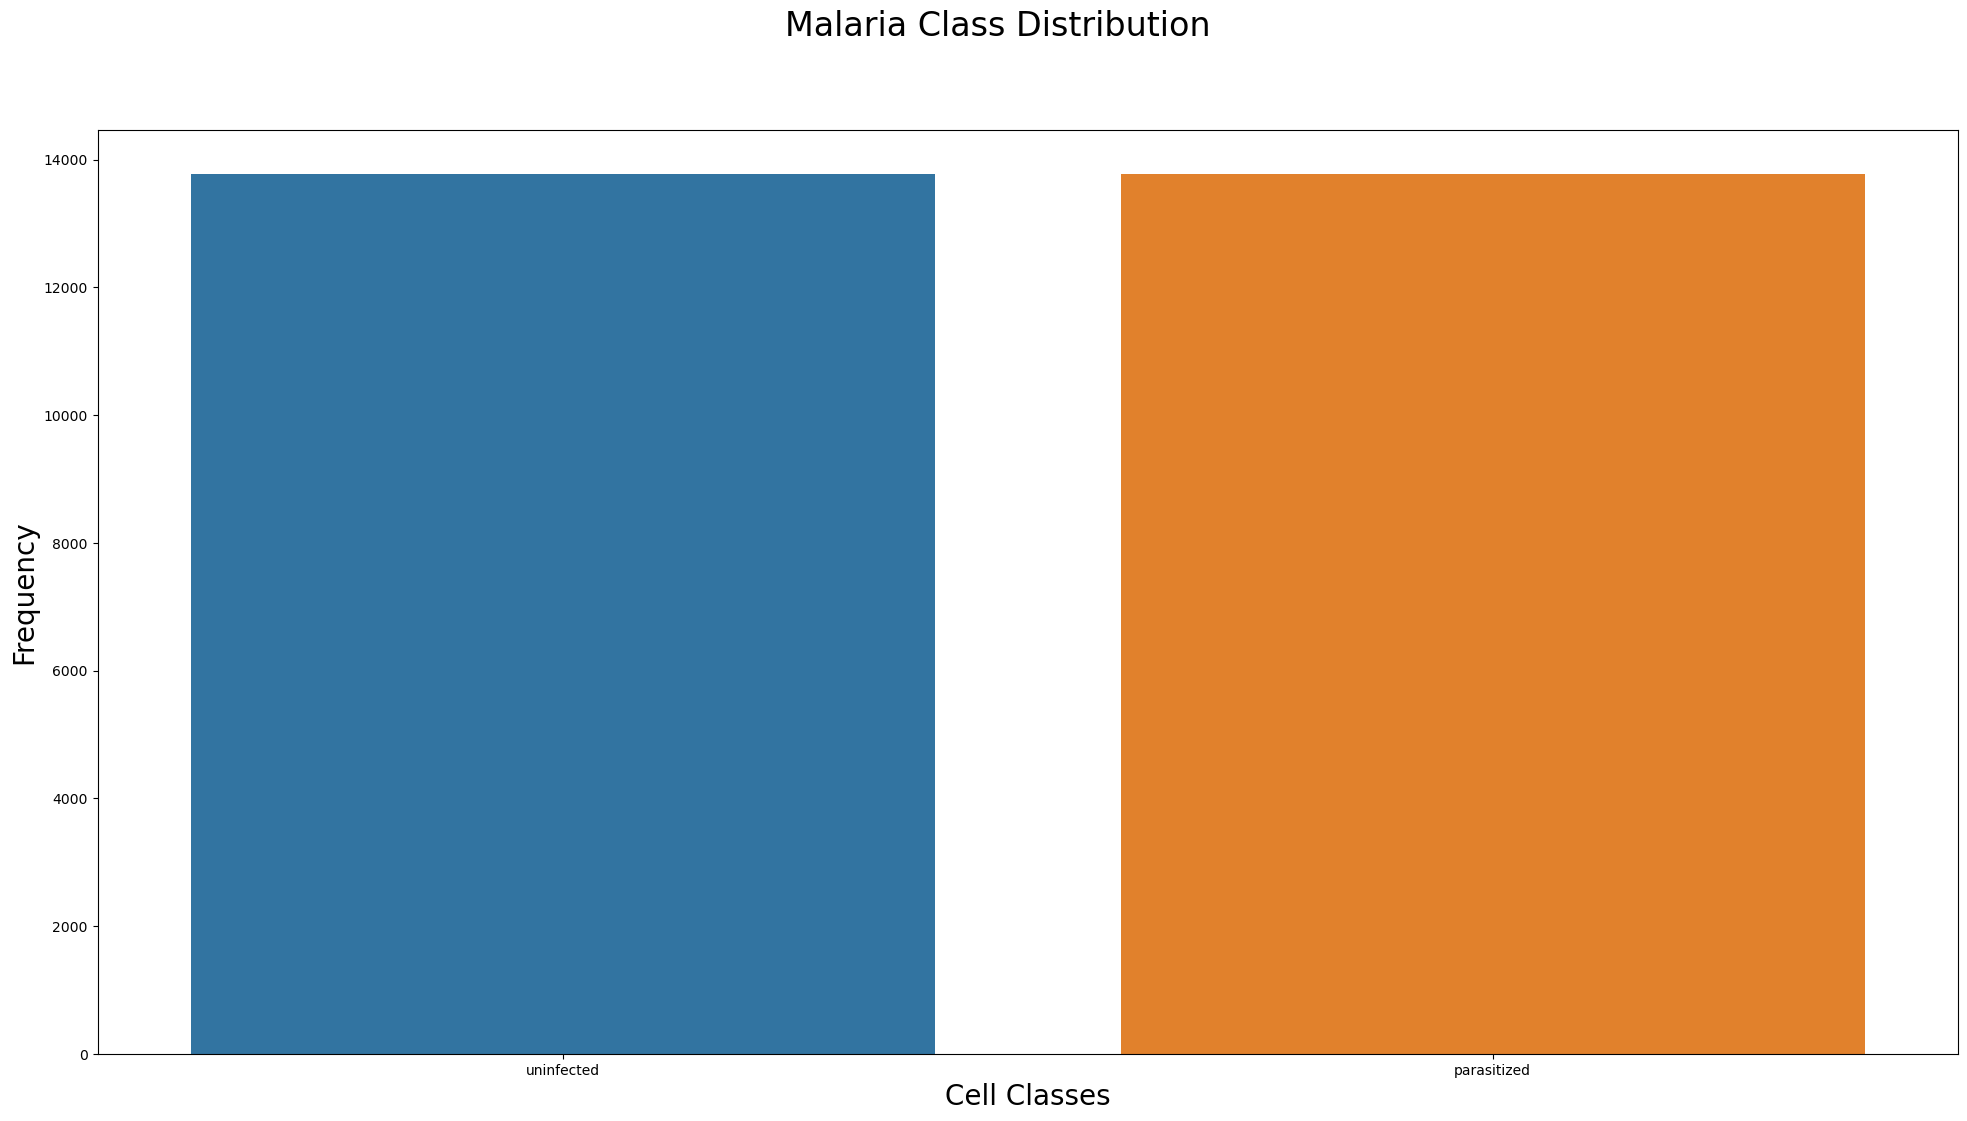

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# this is a class distribution 
fig,ax = plt.subplots(figsize=(24,12))
temp = df['label'].value_counts().values
sns.barplot(x = df['label'].value_counts().index.tolist(),y = df['label'].value_counts().values.tolist())
for i,text in enumerate(df['label'].value_counts(normalize = True).items()):
    ax.annotate("{:.2f}%".format(text[1]*100),xy = (i-0.10,temp[i]+1000),fontsize = 20)
plt.xlabel("Cell Classes",fontsize = 20)
plt.ylabel("Frequency",fontsize = 20)
plt.suptitle("Malaria Class Distribution",fontsize = 24)
plt.show()

### Split data into train and test

In [13]:
df

,path,label
0,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png,uninfected
1,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png,uninfected
2,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png,uninfected
3,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png,uninfected
4,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png,uninfected
...,...,...
27553,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C175P136NThinF_IMG_20151127_142009_cell_213.png,parasitized
27554,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C118P79ThinF_IMG_20151002_105125_cell_156.png,parasitized
27555,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171844_cell_85.png,parasitized
27556,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C91P52ThinF_IMG_20150821_124937_cell_189.png,parasitized


In [14]:
from sklearn.model_selection import train_test_split
df_temp = df.copy()
X = df.drop(['path'], axis=1)
y = pd.DataFrame(df.pop('path'),columns=['path'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)

In [15]:
train_df = pd.concat([y_train,X_train], axis=1)
test_df = pd.concat([ y_test,X_test], axis=1)

In [16]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

## Build Model

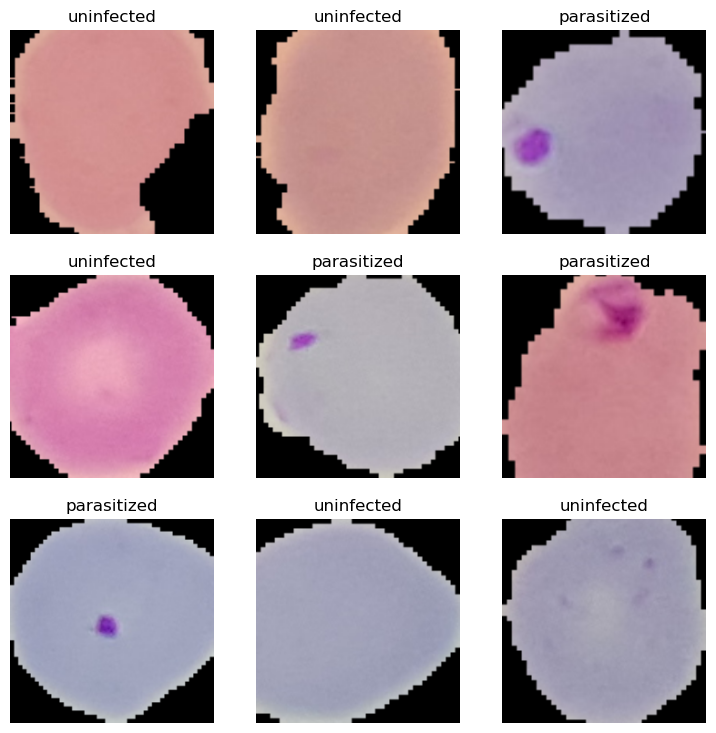

In [17]:
dls = ImageDataLoaders.from_df(
   
    train_df,valid_pct=0.2, seed=42,
    item_tfms=Resize(224))
dls.show_batch()

In [18]:
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models), avail_pretrained_models[:5]

(770,
 ['adv_inception_v3',
  'bat_resnext26ts',
  'beit_base_patch16_224',
  'beit_base_patch16_224_in22k',
  'beit_base_patch16_384'])

In [19]:
learn = vision_learner(dls, 'hrnet_w18_small', metrics=error_rate).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-hrnet/hrnet_w18_small_v1-f460c6bc.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w18_small_v1-f460c6bc.pth


In [20]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.245872,0.147115,0.052846,01:56


epoch,train_loss,valid_loss,error_rate,time
0,0.161362,0.125433,0.041733,01:32
1,0.144478,0.116367,0.042640,01:31
2,0.115267,0.114498,0.040372,01:31
3,0.092172,0.103955,0.039238,01:31
4,0.070025,0.102260,0.035155,01:31


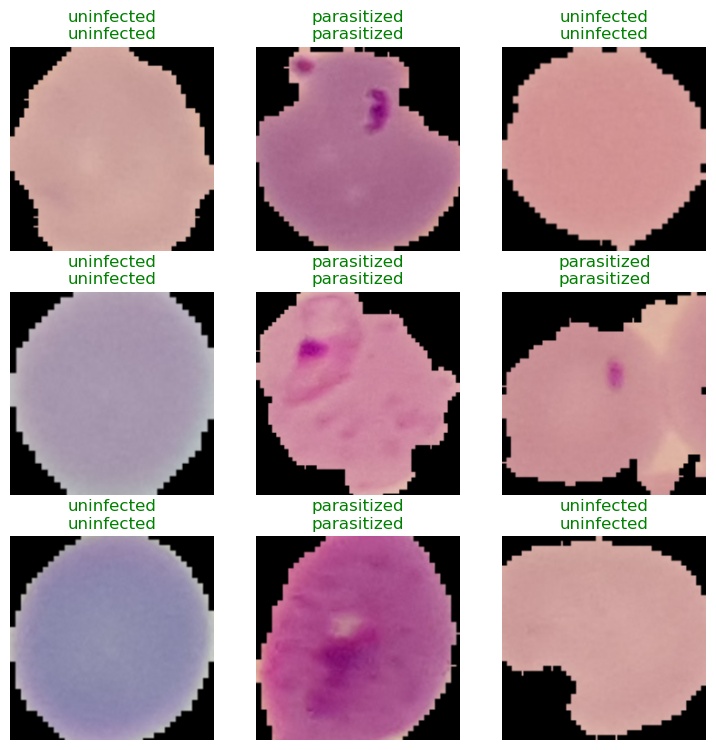

In [21]:
learn.show_results()

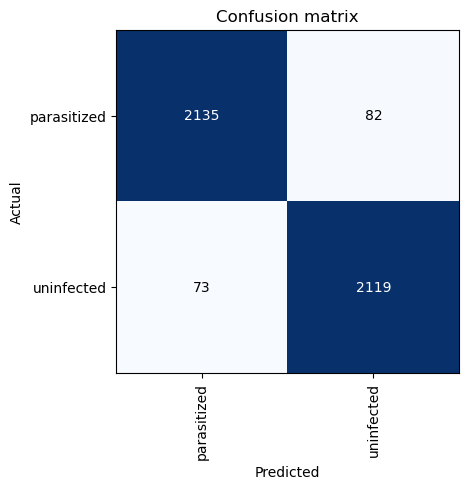

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

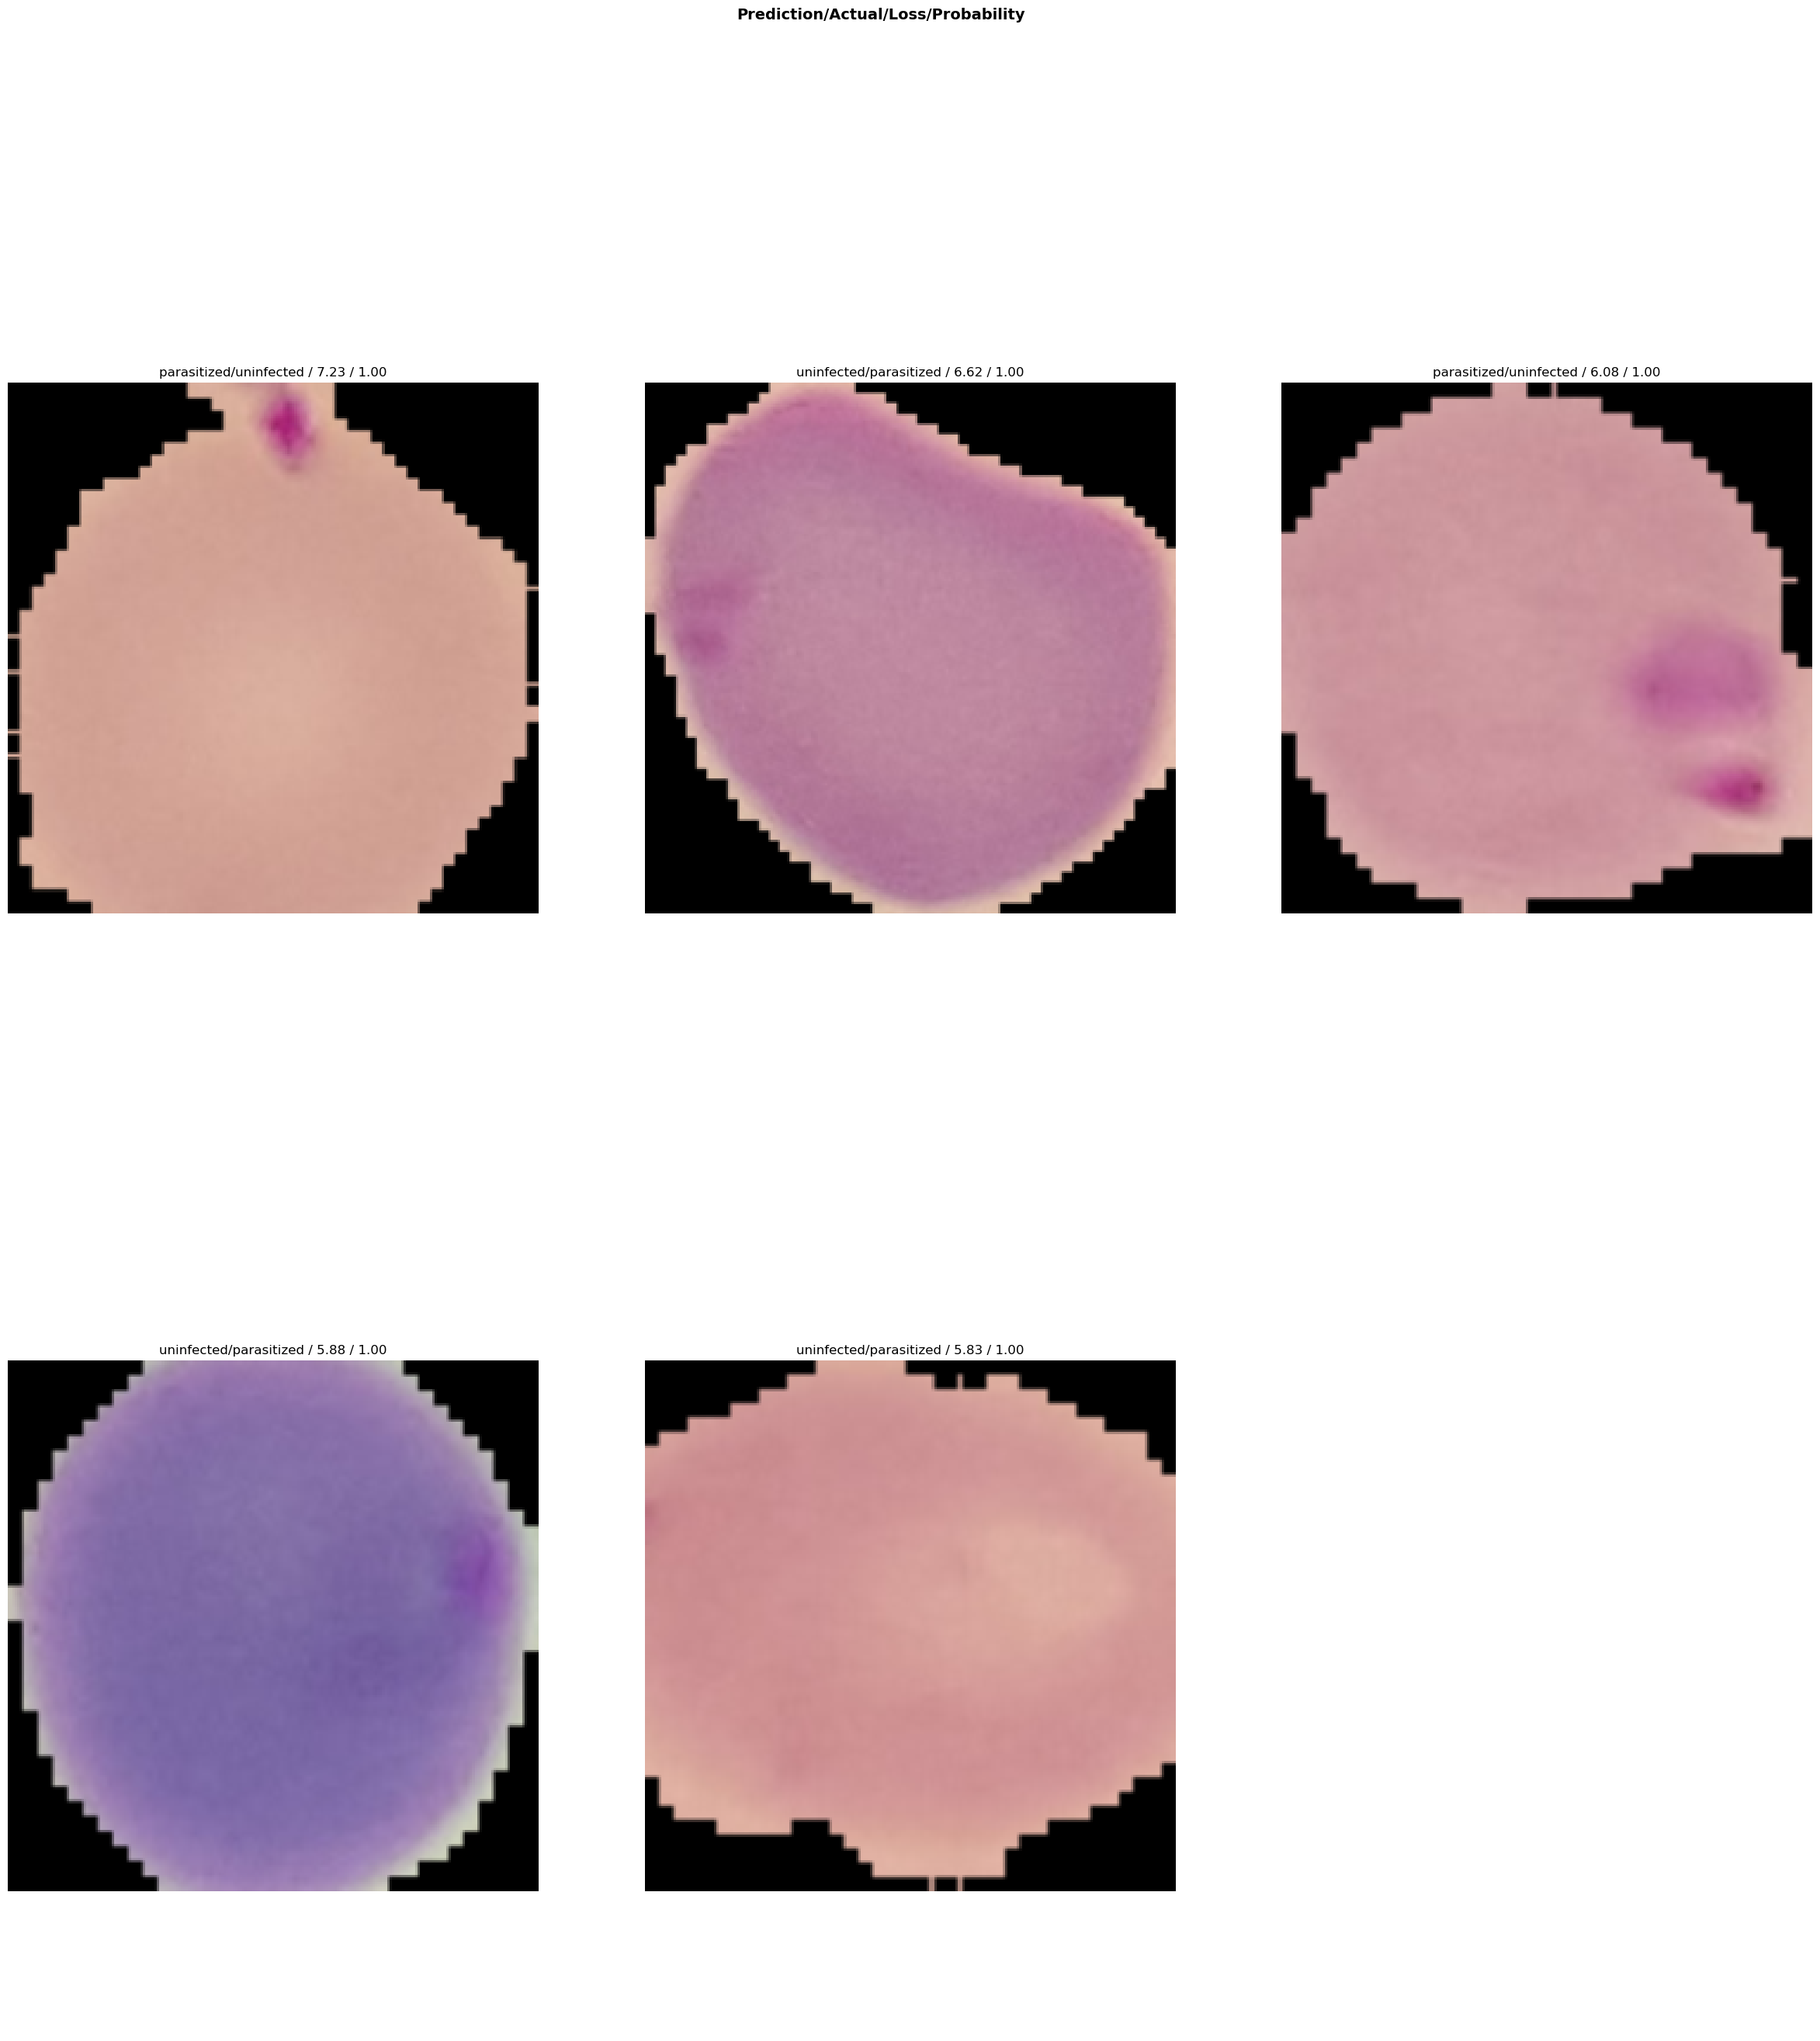

In [23]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=5,figsize=(30,30))

In [24]:
test_dl = dls.test_dl(test_df, with_labels=True)

Accuracy on Test dataset

In [25]:
preds = learn.get_preds(dl=test_dl)
learn.validate(dl=test_dl)

(#2) [0.09838463366031647,0.03247459977865219]

In [26]:
accuracy(preds[0], preds[1])

TensorBase(0.9675)

96.55% accuracy tested!

In [27]:
learn.export('malaria.pkl')

In [28]:
test_df

,path,label
0,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C132P93ThinF_IMG_20151004_152505_cell_52.png,uninfected
1,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C56P17thinF_IMG_20150728_160623_cell_3.png,uninfected
2,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C117P78ThinF_IMG_20150930_220616_cell_95.png,parasitized
3,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C184P145ThinF_IMG_20151203_102543_cell_138.png,parasitized
4,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C70P31_ThinF_IMG_20150813_130332_cell_107.png,parasitized
...,...,...
5507,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C129P90ThinF_IMG_20151004_133538_cell_106.png,parasitized
5508,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C117P78ThinF_IMG_20150930_221812_cell_16.png,uninfected
5509,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C152P113ThinF_IMG_20151115_124032_cell_36.png,uninfected
5510,../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C153P114ThinF_IMG_20151115_135911_cell_32.png,uninfected


In [29]:
test_df.to_csv('test_dataset')